<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/Skimage_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://scikit-image.org/_static/img/logo.png" alt="Scikit Image" />


<!--- @wandbcode{skimage-train} -->

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%capture
!rm *.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png

!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman2_test4.png

In [3]:
import skimage.io
import skimage.transform

In [4]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

# Az a jó ebben, hogy ki tud nyúlni az internetre

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


In [8]:
def to_gray_img(pic):

  gray_ = (pic[:, :, 0] + pic[:, :, 1] + pic[:, :, 0])/3

  return gray_

gray = to_gray_img(pic1)

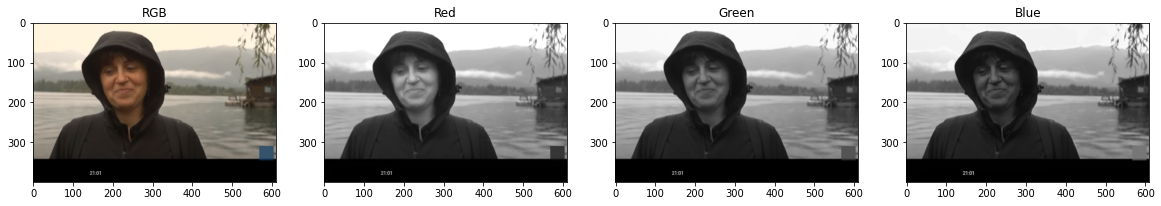

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

plt.show()

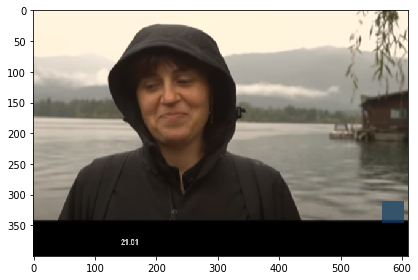

In [15]:
skimage.io.imshow(pic1)
skimage.io.show()

In [17]:
skimage.io.imsave('woman1_saved.png', pic1)

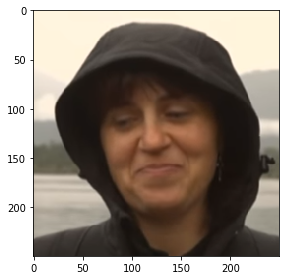

In [53]:
cropped = skimage.util.crop(pic1, ((10, 120), (50, 200), (0,0)), copy=False)
# ((from_tom, from bottom), (from_right, from_left))

# nem rossz de ennél sokkal jobb, ha én tudom beállítani, hogy milyen széles és magas legyen a kép, biztosítva az arányokat
cropped = pic1[10:260, 100:350,:]

skimage.io.imshow(cropped)
skimage.io.show()

# resized = skimage.transform.resize(cropped, (100, 100))
# skimage.io.imshow(resized)
# skimage.io.show()

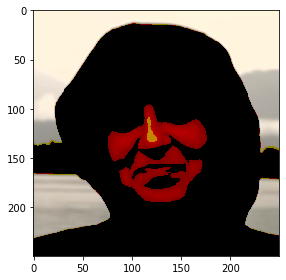

In [59]:
selected = cropped.copy()
selected[selected < 128] = 0
skimage.io.imshow(selected)
skimage.io.show()


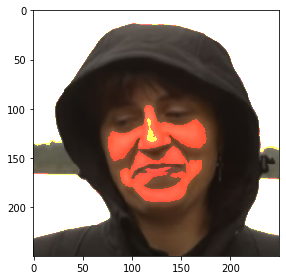

In [61]:
selected = cropped.copy()
selected[selected > 128] = 255
skimage.io.imshow(selected)
skimage.io.show()


In [62]:
print(pic1.min())
print(pic1.max())

0
255


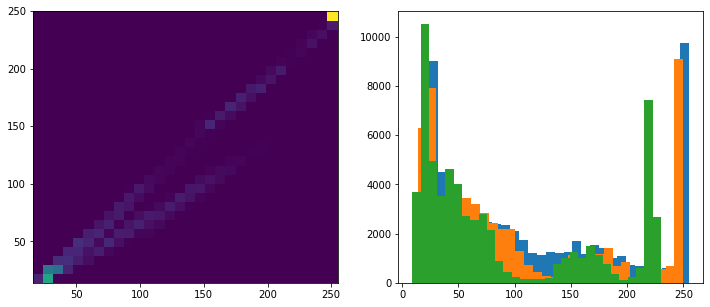

In [69]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))
ax0.hist2d(x = cropped[:,:,0].ravel(), y = cropped[:,:,1].ravel(), bins=30)
ax1.hist(cropped[:,:,0].ravel(), bins=30)
ax1.hist(cropped[:,:,1].ravel(), bins=30)
ax1.hist(cropped[:,:,2].ravel(), bins=30)
plt.show()

r_std = 80.68, g_std = 80.30, b_std = 75.53
r_avg = 116.2, g_avg = 101.3, b_avg = 87.9


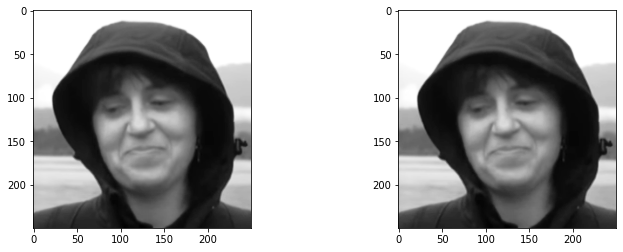

In [107]:
r = cropped[:,:,0]
g = cropped[:,:,1]
b = cropped[:,:,2]

# --

r_std = r.std(); g_std = g.std(); b_std = b.std()
print('r_std = {:.2f}, g_std = {:.2f}, b_std = {:.2f}'.format(r_std, g_std, b_std))

r_avg = r.mean(); g_avg = g.mean(); b_avg = b.mean()
print('r_avg = {:.1f}, g_avg = {:.1f}, b_avg = {:.1f}'.format(r_avg, g_avg, b_avg))

# --

def z_score(matrix):
  'return a matrix with its standardized values'
  std = matrix.std()
  avg = matrix.mean()
  z = (matrix - avg) / std
  z = z + abs(z.min())
  z = z * (255/z.max())
  z = z.astype('uint8')
  
  return z

z = z_score(r)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))
ax0.imshow(r, cmap='Greys_r')
ax1.imshow(z, cmap='Greys_r')
plt.show()


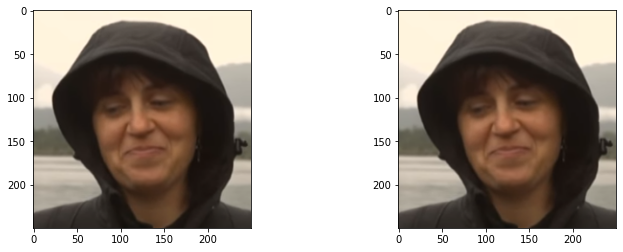

In [116]:
r_z = z_score(r); g_z = z_score(g); b_z = z_score(b)

z = np.array([r_z, g_z, b_z]).T

z = np.dstack((r, g, b))

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))
ax0.imshow(cropped, cmap='Greys_r')
ax1.imshow(z, cmap='Greys_r')
plt.show()


# Vicceskedés

Csak arra vagyok kíváncsi, hogy ha egy neurális hálóval becsülöm az RGB értékeket az miben más minthat a HSV értékeket becsülöm f(x,y) alapján.

Csak egy próba, nem kell komolyan venni. Gyakorlás.

In [129]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [122]:
def create_xy_coordinate_array(gray):
  image_height_rows = gray.shape[0]
  image_width_cols  = gray.shape[1]
  print('image_height_rows', image_height_rows)
  print('image_width_cols ', image_width_cols)
  pixels = gray.flatten(order='C')                                  # 'C' = Rows then Cols
  size = gray.size
  _x_tmp  = np.arange(start=0, stop=image_width_cols, step=1)       # [0, 1, 2, ..., image_width_cols]
  image_width_cols_x = np.repeat(_x_tmp, image_height_rows)         # annyi ilyet csinál ahány sor van
  # > [0, 0, 0, ..., 1, 1, 1, ..., 2, 2, 2, ...]
  _y_tmp  = np.arange(start=0, stop=image_height_rows, step=1)      # [0, 1, 2, ..., image_height_rows]
  image_height_rows_y = np.tile(_y_tmp, image_width_cols)           # annyi ilyet csinál ahány oszlop van
  # > [1, 2, 3, ..., 1, 2, 3, ..., 1, 2, 3, ...]

  return pixels, image_height_rows_y, image_width_cols_x            # z, y(rows, height), x(cols, width)

In [186]:
def reconstruct(img, r, g, b):
  rows = img.shape[0]
  cols = img.shape[1]

  r_ = r.reshape((rows, cols))
  g_ = g.reshape((rows, cols))
  b_ = b.reshape((rows, cols))

  reconstructed = np.dstack((r_, g_, b_))

  return reconstructed



def reconstruct_one(img, r):
  rows = img.shape[0]
  cols = img.shape[1]

  reconstructed = r.reshape((rows, cols))
  
  return reconstructed




## Neural Net 1



```
# - solver: 'adam'
# - layers: (10, 10)
# - max_iter: 10
# - batch_size = 32
# - learning_rate = 0.015
# - activation: 'relu'
# - scaler: StandardScaler
```



In [247]:
# A kép
# woman1

r = cropped[:,:,0]
g = cropped[:,:,1]
b = cropped[:,:,2]

_r, y, x = create_xy_coordinate_array(r)
_g, y, x = create_xy_coordinate_array(g)
_b, y, x = create_xy_coordinate_array(b)

# Create X and y variables

X = np.array([x, y]).T
y = np.array([_r, _g, _b]).T

print(X.shape, y.shape)

# Normalize

X_scaler = MinMaxScaler((0, 1))
y_scaler = MinMaxScaler((0, 1))

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

# Create model

mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                   activation='relu',               # 'tanh', 'logistic'
                   solver='adam',                   # 'sgd', 'lbfgs'
                   batch_size=32,
                   learning_rate_init=0.015,
                   max_iter=10,
                   validation_fraction=0.0,
                   random_state = 1,
                   verbose=0,
                   n_iter_no_change=99999)

mlp.fit(X, y)

pred = mlp.predict(X)

# --
pred_inv = y_scaler.inverse_transform(pred)

# --
r_pred = pred_inv[:,0].astype('uint8')
g_pred = pred_inv[:,1].astype('uint8')
b_pred = pred_inv[:,2].astype('uint8')

image_height_rows 250
image_width_cols  250
image_height_rows 250
image_width_cols  250
image_height_rows 250
image_width_cols  250
(62500, 2) (62500, 3)


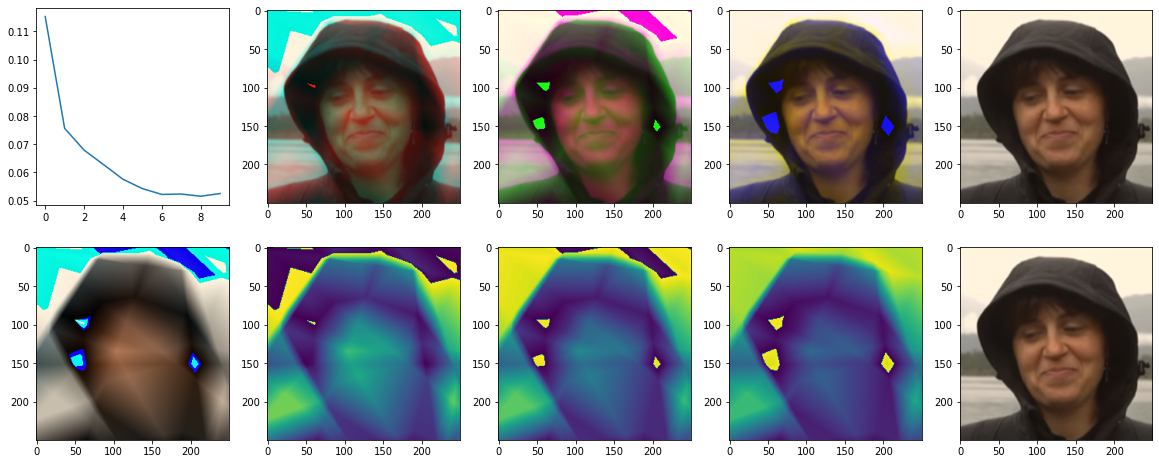

In [248]:
pred_rgb = reconstruct(cropped, r_pred, g_pred, b_pred)

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax[0, 0].plot(mlp.loss_curve_)
ax[0, 1].imshow(reconstruct(cropped, r_pred, g, b))
ax[0, 2].imshow(reconstruct(cropped, r, g_pred, b))
ax[0, 3].imshow(reconstruct(cropped, r, g, b_pred))
ax[0, 4].imshow(cropped)
ax[1, 0].imshow(reconstruct(cropped, r_pred, g_pred, b_pred))
ax[1, 1].imshow(reconstruct_one(cropped, r_pred))
ax[1, 2].imshow(reconstruct_one(cropped, g_pred))
ax[1, 3].imshow(reconstruct_one(cropped, b_pred))
ax[1, 4].imshow(cropped)
plt.show()



# Visualize Net

[ 2 10 10  3]


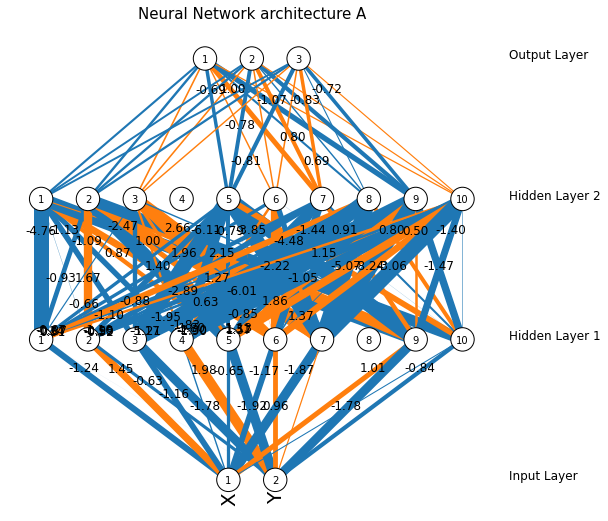

In [249]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

num_input_varialbe = ['X', 'Y']
num_outpu_variable = ['R', 'G', 'B']

net = mlp

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [len(num_outpu_variable)]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, net.coefs_, num_input_varialbe)
network.draw()

## Neural Net 2

```
# - solver: 'adam'
# - layers: (10, 10)
# - max_iter: 20
# - batch_size = 32
# - learning_rate = 0.015
# - activation: 'relu'
# - sclaer: MinMaxScaler
```

In [252]:
# A kép
# woman1

r = cropped[:,:,0]
g = cropped[:,:,1]
b = cropped[:,:,2]

_r, y, x = create_xy_coordinate_array(r)
_g, y, x = create_xy_coordinate_array(g)
_b, y, x = create_xy_coordinate_array(b)

# Create X and y variables

X = np.array([x, y]).T
y = np.array([_r, _g, _b]).T

print(X.shape, y.shape)

# Normalize

X_scaler = MinMaxScaler((0, 1))
y_scaler = MinMaxScaler((0, 1))

# X_scaler = StandardScaler()
# y_scaler = StandardScaler()

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

# Create model

mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                   activation='relu',               # 'tanh', 'logistic'
                   solver='adam',                   # 'sgd', 'lbfgs'
                   batch_size=32,
                   learning_rate_init=0.015,
                   max_iter=10,
                   validation_fraction=0.0,
                   random_state = 1,
                   verbose=0,
                   n_iter_no_change=99999)

mlp.fit(X, y)

pred = mlp.predict(X)

# --
pred_inv = y_scaler.inverse_transform(pred)

# --
r_pred = pred_inv[:,0].astype('uint8')
g_pred = pred_inv[:,1].astype('uint8')
b_pred = pred_inv[:,2].astype('uint8')

image_height_rows 250
image_width_cols  250
image_height_rows 250
image_width_cols  250
image_height_rows 250
image_width_cols  250
(62500, 2) (62500, 3)


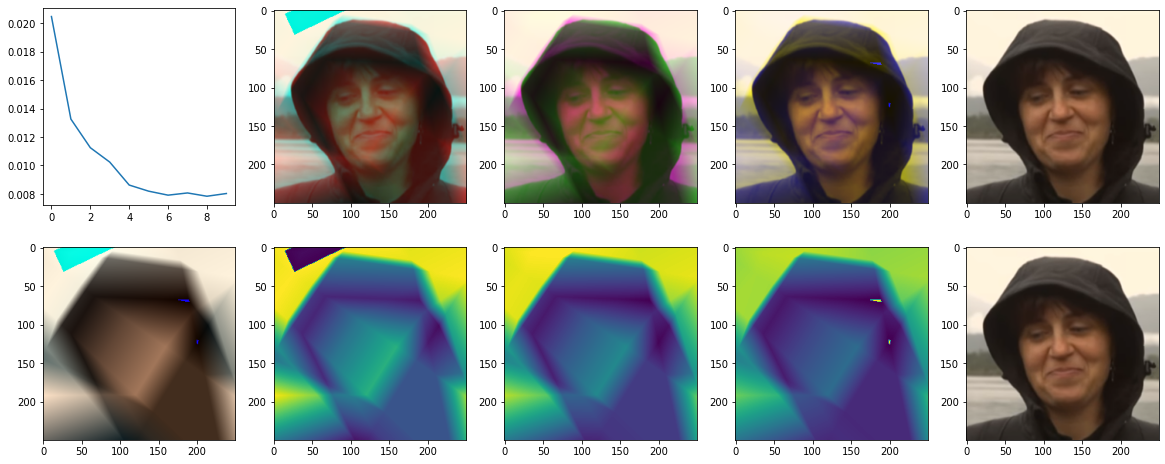

In [253]:
pred_rgb = reconstruct(cropped, r_pred, g_pred, b_pred)

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax[0, 0].plot(mlp.loss_curve_)
ax[0, 1].imshow(reconstruct(cropped, r_pred, g, b))
ax[0, 2].imshow(reconstruct(cropped, r, g_pred, b))
ax[0, 3].imshow(reconstruct(cropped, r, g, b_pred))
ax[0, 4].imshow(cropped)
ax[1, 0].imshow(reconstruct(cropped, r_pred, g_pred, b_pred))
ax[1, 1].imshow(reconstruct_one(cropped, r_pred))
ax[1, 2].imshow(reconstruct_one(cropped, g_pred))
ax[1, 3].imshow(reconstruct_one(cropped, b_pred))
ax[1, 4].imshow(cropped)
plt.show()



## Neural Net 3

```
# - solver: 'adam'
# - layers: (10, 10)
# - max_iter: 10
# - batch_size = 32
# - learning_rate = 0.015
# - activation: 'relu'
# - sclaer: - csak az x-re MinMaxScaler
```

In [262]:
# A kép
# woman1

r = cropped[:,:,0]
g = cropped[:,:,1]
b = cropped[:,:,2]

_r, y, x = create_xy_coordinate_array(r)
_g, y, x = create_xy_coordinate_array(g)
_b, y, x = create_xy_coordinate_array(b)

# Create X and y variables

X = np.array([x, y]).T
y = np.array([_r, _g, _b]).T

print(X.shape, y.shape)

# Normalize

X_scaler = MinMaxScaler((0, 1))
# y_scaler = MinMaxScaler((0, 1))

# X_scaler = StandardScaler()
# y_scaler = StandardScaler()

X = X_scaler.fit_transform(X)
# y = y_scaler.fit_transform(y)

# Create model

mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                   activation='relu',               # 'tanh', 'logistic'
                   solver='adam',                   # 'sgd', 'lbfgs'
                   batch_size=32,
                   learning_rate_init=0.015,
                   max_iter=10,
                   validation_fraction=0.0,
                   random_state = 1,
                   verbose=0,
                   n_iter_no_change=99999)

mlp.fit(X, y)

pred = mlp.predict(X)

# --
# pred_inv = y_scaler.inverse_transform(pred)
pred_inv = pred

# --
r_pred = pred_inv[:,0].astype('uint8')
g_pred = pred_inv[:,1].astype('uint8')
b_pred = pred_inv[:,2].astype('uint8')

image_height_rows 250
image_width_cols  250
image_height_rows 250
image_width_cols  250
image_height_rows 250
image_width_cols  250
(62500, 2) (62500, 3)


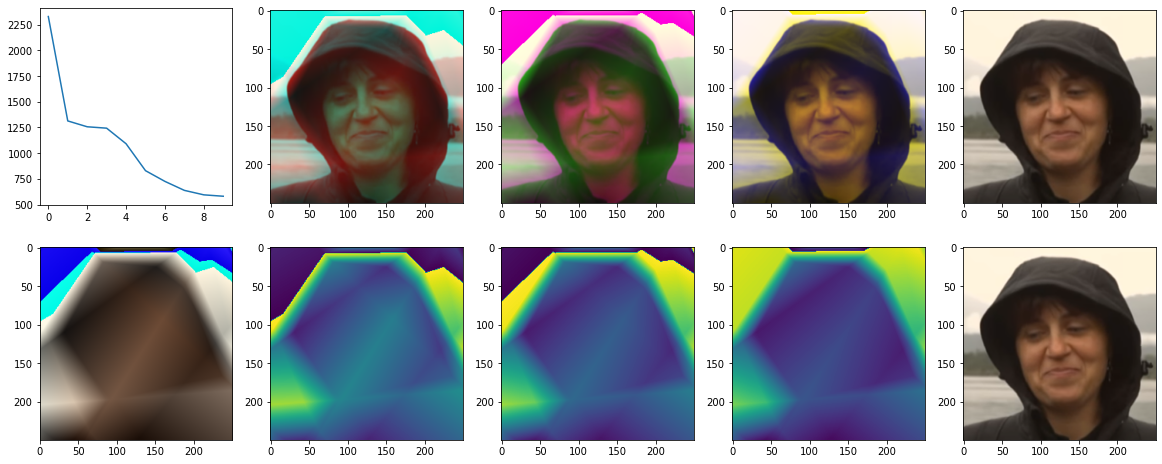

In [263]:
pred_rgb = reconstruct(cropped, r_pred, g_pred, b_pred)

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax[0, 0].plot(mlp.loss_curve_)
ax[0, 1].imshow(reconstruct(cropped, r_pred, g, b))
ax[0, 2].imshow(reconstruct(cropped, r, g_pred, b))
ax[0, 3].imshow(reconstruct(cropped, r, g, b_pred))
ax[0, 4].imshow(cropped)
ax[1, 0].imshow(reconstruct(cropped, r_pred, g_pred, b_pred))
ax[1, 1].imshow(reconstruct_one(cropped, r_pred))
ax[1, 2].imshow(reconstruct_one(cropped, g_pred))
ax[1, 3].imshow(reconstruct_one(cropped, b_pred))
ax[1, 4].imshow(cropped)
plt.show()



## Neural Net 4

```
# - solver: 'adam'
# - layers: (10, 10)
# - max_iter: 10
# - batch_size = 32
# - learning_rate = 0.015
# - activation: 'tanh'
# - sclaer: MinMaxScaler
```

In [264]:
# A kép
# woman1

r = cropped[:,:,0]
g = cropped[:,:,1]
b = cropped[:,:,2]

_r, y, x = create_xy_coordinate_array(r)
_g, y, x = create_xy_coordinate_array(g)
_b, y, x = create_xy_coordinate_array(b)

# Create X and y variables

X = np.array([x, y]).T
y = np.array([_r, _g, _b]).T

print(X.shape, y.shape)

# Normalize

X_scaler = MinMaxScaler((0, 1))
y_scaler = MinMaxScaler((0, 1))

# X_scaler = StandardScaler()
# y_scaler = StandardScaler()

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

# Create model

mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                   activation='tanh',               # 'tanh', 'logistic'
                   solver='adam',                   # 'sgd', 'lbfgs'
                   batch_size=32,
                   learning_rate_init=0.015,
                   max_iter=10,
                   validation_fraction=0.0,
                   random_state = 1,
                   verbose=0,
                   n_iter_no_change=99999)

mlp.fit(X, y)

pred = mlp.predict(X)

# --
pred_inv = y_scaler.inverse_transform(pred)

# --
r_pred = pred_inv[:,0].astype('uint8')
g_pred = pred_inv[:,1].astype('uint8')
b_pred = pred_inv[:,2].astype('uint8')

image_height_rows 250
image_width_cols  250
image_height_rows 250
image_width_cols  250
image_height_rows 250
image_width_cols  250
(62500, 2) (62500, 3)


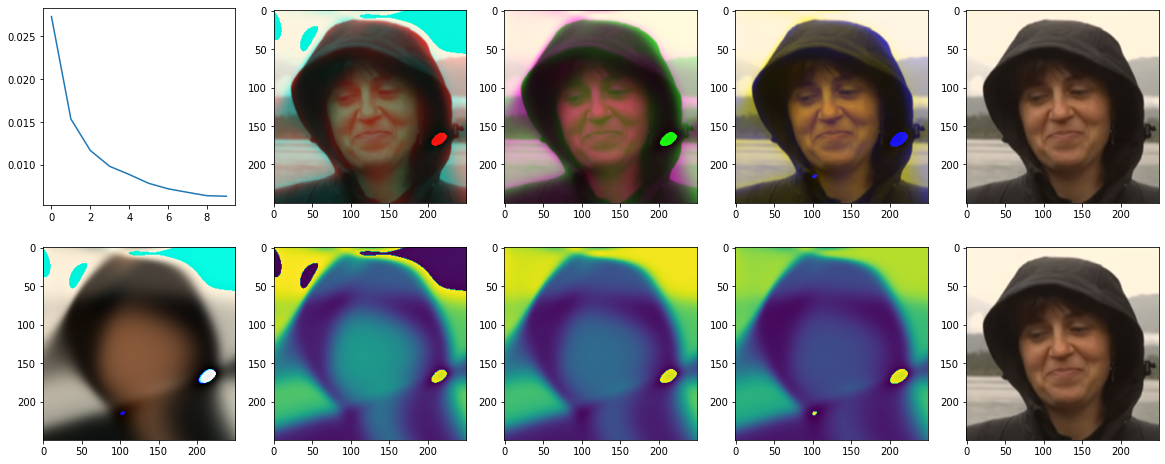

In [265]:
pred_rgb = reconstruct(cropped, r_pred, g_pred, b_pred)

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax[0, 0].plot(mlp.loss_curve_)
ax[0, 1].imshow(reconstruct(cropped, r_pred, g, b))
ax[0, 2].imshow(reconstruct(cropped, r, g_pred, b))
ax[0, 3].imshow(reconstruct(cropped, r, g, b_pred))
ax[0, 4].imshow(cropped)
ax[1, 0].imshow(reconstruct(cropped, r_pred, g_pred, b_pred))
ax[1, 1].imshow(reconstruct_one(cropped, r_pred))
ax[1, 2].imshow(reconstruct_one(cropped, g_pred))
ax[1, 3].imshow(reconstruct_one(cropped, b_pred))
ax[1, 4].imshow(cropped)
plt.show()



## Neural Net 5

```
# - solver: 'adam'
# - layers: (10, 10)
# - max_iter: 10
# - batch_size = 32
# - learning_rate = 0.015
# - activation: 'tanh'
# - sclaer: StandardScaler
```

In [266]:
# A kép
# woman1

r = cropped[:,:,0]
g = cropped[:,:,1]
b = cropped[:,:,2]

_r, y, x = create_xy_coordinate_array(r)
_g, y, x = create_xy_coordinate_array(g)
_b, y, x = create_xy_coordinate_array(b)

# Create X and y variables

X = np.array([x, y]).T
y = np.array([_r, _g, _b]).T

print(X.shape, y.shape)

# Normalize

# X_scaler = MinMaxScaler((0, 1))
# y_scaler = MinMaxScaler((0, 1))

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

# Create model

mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                   activation='tanh',               # 'tanh', 'logistic'
                   solver='adam',                   # 'sgd', 'lbfgs'
                   batch_size=32,
                   learning_rate_init=0.015,
                   max_iter=10,
                   validation_fraction=0.0,
                   random_state = 1,
                   verbose=0,
                   n_iter_no_change=99999)

mlp.fit(X, y)

pred = mlp.predict(X)

# --
pred_inv = y_scaler.inverse_transform(pred)

# --
r_pred = pred_inv[:,0].astype('uint8')
g_pred = pred_inv[:,1].astype('uint8')
b_pred = pred_inv[:,2].astype('uint8')

image_height_rows 250
image_width_cols  250
image_height_rows 250
image_width_cols  250
image_height_rows 250
image_width_cols  250
(62500, 2) (62500, 3)


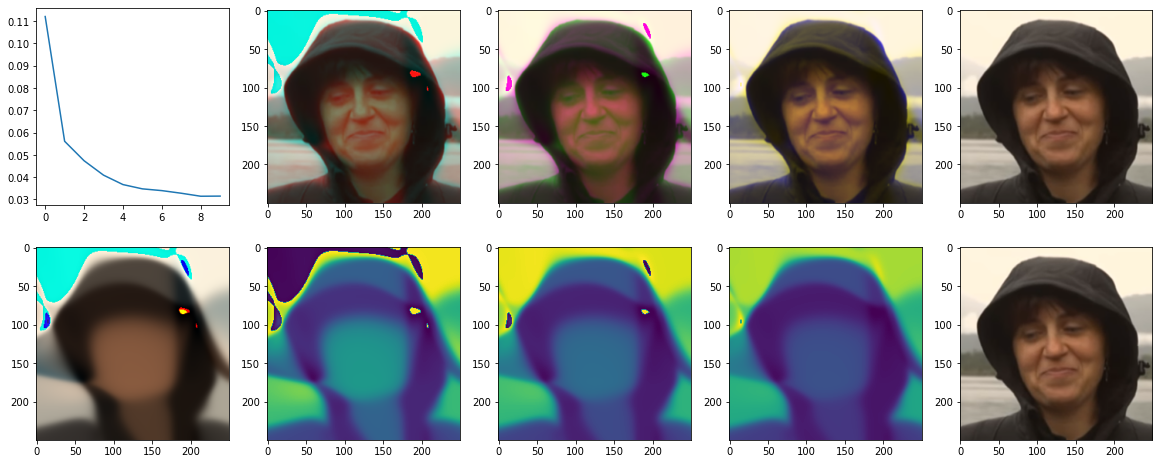

In [267]:
pred_rgb = reconstruct(cropped, r_pred, g_pred, b_pred)

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax[0, 0].plot(mlp.loss_curve_)
ax[0, 1].imshow(reconstruct(cropped, r_pred, g, b))
ax[0, 2].imshow(reconstruct(cropped, r, g_pred, b))
ax[0, 3].imshow(reconstruct(cropped, r, g, b_pred))
ax[0, 4].imshow(cropped)
ax[1, 0].imshow(reconstruct(cropped, r_pred, g_pred, b_pred))
ax[1, 1].imshow(reconstruct_one(cropped, r_pred))
ax[1, 2].imshow(reconstruct_one(cropped, g_pred))
ax[1, 3].imshow(reconstruct_one(cropped, b_pred))
ax[1, 4].imshow(cropped)
plt.show()



## Neural Net 4

Na tipikusan ez az amivel az ember a végtelenségig el tudna játszani.

Viszont mivel az idő kevés, a becslés nagyon lapos, nézzük meg, csak egy kimeneti változóra.

```
# - solver: 'adam'
# - layers: (10, 10)
# - max_iter: 10
# - batch_size = 32
# - learning_rate = 0.015
# - activation: 'tanh'
# - sclaer: StandardScaler
```

In [268]:
# Az elöző elemzésből megmaradt változót tegyük el megőrzésre mert valamire kíváncsi vagyok

multi_type_regression_r_pred = r_pred.copy()

print(multi_type_regression_r_pred.shape)

(62500,)


In [269]:
# A kép
# woman1

r = cropped[:,:,0]
# g = cropped[:,:,1]
# b = cropped[:,:,2]

_r, y, x = create_xy_coordinate_array(r)
# _g, y, x = create_xy_coordinate_array(g)
# _b, y, x = create_xy_coordinate_array(b)

# Create X and y variables

X = np.array([x, y]).T
# y = np.array([_r, _g, _b]).T
y = np.array([_r]).T

print(X.shape, y.shape)

# Normalize

# X_scaler = MinMaxScaler((0, 1))
# y_scaler = MinMaxScaler((0, 1))

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

# Create model

mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                   activation='tanh',               # 'tanh', 'logistic'
                   solver='adam',                   # 'sgd', 'lbfgs'
                   batch_size=32,
                   learning_rate_init=0.015,
                   max_iter=10,
                   validation_fraction=0.0,
                   random_state = 1,
                   verbose=0,
                   n_iter_no_change=99999)

mlp.fit(X, y.flatten())

pred = mlp.predict(X)

# --
pred_inv = y_scaler.inverse_transform(pred.reshape(-1, 1)).astype('uint8')



image_height_rows 250
image_width_cols  250
(62500, 2) (62500, 1)


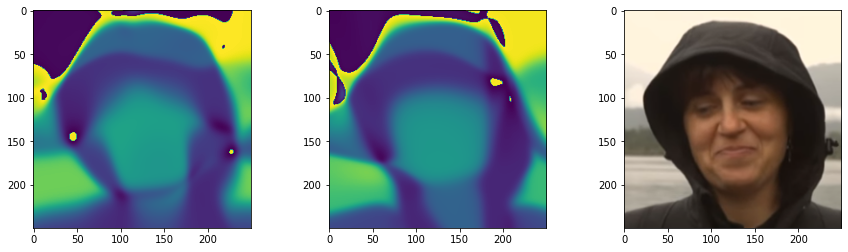

In [270]:

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 4))
ax0.imshow(reconstruct_one(cropped, pred_inv))
ax1.imshow(reconstruct_one(cropped, multi_type_regression_r_pred))
ax2.imshow(cropped)
plt.show()



## Neural Net 5

Hát kb ez az amire azt mondanám, hogy kurva szar.

Hagyom tovább tanulni, hogy lássam mi az elméleti maximum.

```
# - solver: 'adam'
# - layers: (10, 10)
# - max_iter: 200
# - batch_size = 32
# - learning_rate = 0.015
# - activation: 'tanh'
# - sclaer: StandardScaler
```

In [277]:
# A kép
# woman1

r = cropped[:,:,0]
# g = cropped[:,:,1]
# b = cropped[:,:,2]

_r, y, x = create_xy_coordinate_array(r)
# _g, y, x = create_xy_coordinate_array(g)
# _b, y, x = create_xy_coordinate_array(b)

# Create X and y variables

X = np.array([x, y]).T
# y = np.array([_r, _g, _b]).T
y = np.array([_r]).T

print(X.shape, y.shape)

# Normalize

# X_scaler = MinMaxScaler((0, 1))
# y_scaler = MinMaxScaler((0, 1))

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

# Create model

mlp = MLPRegressor(hidden_layer_sizes=(20, 10),
                   activation='tanh',               # 'tanh', 'logistic'
                   solver='adam',                   # 'sgd', 'lbfgs'
                   batch_size=32,
                   learning_rate_init=0.015,
                   max_iter=50,
                   validation_fraction=0.0,
                   random_state = 1,
                   verbose=1,
                   n_iter_no_change=99999)

mlp.fit(X, y.flatten())

pred = mlp.predict(X)

# --
pred_inv = y_scaler.inverse_transform(pred.reshape(-1, 1)).astype('uint8')



image_height_rows 250
image_width_cols  250
(62500, 2) (62500, 1)
Iteration 1, loss = 0.11920638
Iteration 2, loss = 0.06256833
Iteration 3, loss = 0.05919279
Iteration 4, loss = 0.05537172
Iteration 5, loss = 0.05334065
Iteration 6, loss = 0.05229154
Iteration 7, loss = 0.05074040
Iteration 8, loss = 0.04852767
Iteration 9, loss = 0.04495637
Iteration 10, loss = 0.04135497
Iteration 11, loss = 0.04005336
Iteration 12, loss = 0.03731825
Iteration 13, loss = 0.03496330
Iteration 14, loss = 0.03444355
Iteration 15, loss = 0.03302482
Iteration 16, loss = 0.03323546
Iteration 17, loss = 0.03214886
Iteration 18, loss = 0.03177180
Iteration 19, loss = 0.03225641
Iteration 20, loss = 0.03078371
Iteration 21, loss = 0.03083045
Iteration 22, loss = 0.03074850
Iteration 23, loss = 0.02898928
Iteration 24, loss = 0.02871244
Iteration 25, loss = 0.02832205
Iteration 26, loss = 0.02805551
Iteration 27, loss = 0.02806392
Iteration 28, loss = 0.02685254
Iteration 29, loss = 0.02734702
Iteration 30, l

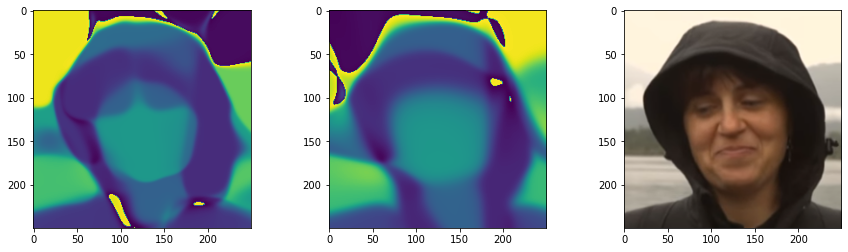

In [278]:

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 4))
ax0.imshow(reconstruct_one(cropped, pred_inv))
ax1.imshow(reconstruct_one(cropped, multi_type_regression_r_pred))
ax2.imshow(cropped)
plt.show()



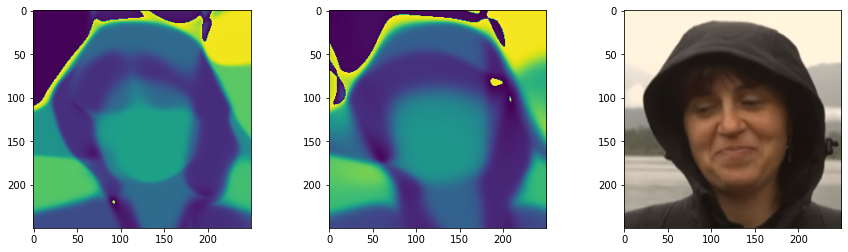

In [276]:

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 4))
ax0.imshow(reconstruct_one(cropped, pred_inv))
ax1.imshow(reconstruct_one(cropped, multi_type_regression_r_pred))
ax2.imshow(cropped)
plt.show()



## Neural Net (Double Scaler)

Csak a vicc kedvéért.

Legyen csak a Red(Gray) de az X,Y legyen kétféle módon is skálázva. MinMax és Standard és ezt a négy vektor-t adom oda bemenetnek.

In [ ]:
# A kép
# woman1

r = cropped[:,:,0]
# g = cropped[:,:,1]
# b = cropped[:,:,2]

_r, y, x = create_xy_coordinate_array(r)
# _g, y, x = create_xy_coordinate_array(g)
# _b, y, x = create_xy_coordinate_array(b)

# Create X and y variables

X = np.array([x, y]).T
# y = np.array([_r, _g, _b]).T
y = np.array([_r]).T

print(X.shape, y.shape)

# Normalize

X_scaler_MinMax = MinMaxScaler((0, 1))
y_scaler_MinMax = MinMaxScaler((0, 1))

X_scaler_Standard = StandardScaler()
y_scaler_Standard = StandardScaler()

X_MinMax = X_scaler_MinMax.fit_transform(X)
y_MinMax = y_scaler_MinMax.fit_transform(y)

X_Standard = X_scaler_Standard.fit_transform(X)
y_Standard = y_scaler_Standard.fit_trainsorm(y)

# Concatenate


# Create model

mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                   activation='tanh',               # 'tanh', 'logistic'
                   solver='adam',                   # 'sgd', 'lbfgs'
                   batch_size=32,
                   learning_rate_init=0.015,
                   max_iter=50,
                   validation_fraction=0.0,
                   random_state = 1,
                   verbose=1,
                   n_iter_no_change=99999)

mlp.fit(X, y.flatten())

pred = mlp.predict(X)

# --
pred_inv = y_scaler.inverse_transform(pred.reshape(-1, 1)).astype('uint8')

